In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
PROJECT_DIR = "../data/raw/"
col_names = [
    'surgery', 'age', 'hospital_number',
    'r_temperature', 'pulse', 'resp_rate',
    'ext_temperature', 'per_pulse', 'muc_membraes',
    'cap_ref_time', 'pain', 'peristalsis', 'abd_distension',
    'naso_tub', 'naso_reflux', 'naso_reflux_ph', 'rect_exam', 'abdomen',
    'pack_cell_vol', 'protein', 'abd_appearance', 'abd_protein', 'outcome',
    'surgical_lesion', 'type_lesion_1', 'type_lesion_2', 'type_lesion_3', 'cp_data', 'extra'
]
df = pd.read_csv(PROJECT_DIR + 'horse-colic.data', sep= ' ', names=col_names, na_values = ['?'])
df.head()

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,protein,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra
0,2.0,1,530101,38.5,66.0,28.0,3.0,3.0,NaN,2.0,...,8.4,NaN,NaN,2.0,2,11300,0,0,2,NaN
1,1.0,1,534817,39.2,88.0,20.0,NaN,NaN,4.0,1.0,...,85.0,2.0,2.0,3.0,2,2208,0,0,2,NaN
2,2.0,1,530334,38.3,40.0,24.0,1.0,1.0,3.0,1.0,...,6.7,NaN,NaN,1.0,2,0,0,0,1,NaN
3,1.0,9,5290409,39.1,164.0,84.0,4.0,1.0,6.0,2.0,...,7.2,3.0,5.3,2.0,1,2208,0,0,1,NaN
4,2.0,1,530255,37.3,104.0,35.0,NaN,NaN,6.0,2.0,...,7.4,NaN,NaN,2.0,2,4300,0,0,2,NaN


In [3]:
df.shape

(300, 29)

In [4]:
df.describe()

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,protein,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra
count,299.000000,300.000000,3.000000e+02,240.000000,276.000000,242.000000,244.000000,231.000000,253.000000,268.000000,...,267.000000,135.000000,102.000000,299.000000,300.000000,300.000000,300.000000,300.000000,300.000000,0.0
mean,1.397993,1.640000,1.085889e+06,38.167917,71.913043,30.417355,2.348361,2.017316,2.853755,1.305970,...,24.456929,2.037037,3.019608,1.551839,1.363333,3657.880000,90.226667,7.363333,1.670000,NaN
std,0.490305,2.173972,1.529801e+06,0.732289,28.630557,17.642231,1.045054,1.042428,1.620294,0.477629,...,27.475009,0.804905,1.968567,0.737187,0.481763,5399.513513,649.569234,127.536674,0.470998,NaN
min,1.000000,1.000000,5.184760e+05,35.400000,30.000000,8.000000,1.000000,1.000000,1.000000,1.000000,...,3.300000,1.000000,0.100000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,NaN
25%,1.000000,1.000000,5.289040e+05,37.800000,48.000000,18.500000,1.000000,1.000000,1.000000,1.000000,...,6.500000,1.000000,2.000000,1.000000,1.000000,2111.750000,0.000000,0.000000,1.000000,NaN
50%,1.000000,1.000000,5.303055e+05,38.200000,64.000000,24.500000,3.000000,2.000000,3.000000,1.000000,...,7.500000,2.000000,2.250000,1.000000,1.000000,2673.500000,0.000000,0.000000,2.000000,NaN
75%,2.000000,1.000000,5.347275e+05,38.500000,88.000000,36.000000,3.000000,3.000000,4.000000,2.000000,...,57.000000,3.000000,3.900000,2.000000,2.000000,3209.000000,0.000000,0.000000,2.000000,NaN
max,2.000000,9.000000,5.305629e+06,40.800000,184.000000,96.000000,4.000000,4.000000,6.000000,3.000000,...,89.000000,3.000000,10.100000,3.000000,2.000000,41110.000000,7111.000000,2209.000000,2.000000,NaN


In [5]:
df['age'] = df[['age']].applymap(lambda x: 'Adult' if x== 1 else 'Young')

In [6]:
df[['age']].value_counts(normalize = True)

age  
Adult    0.92
Young    0.08
dtype: float64

<AxesSubplot:xlabel='age', ylabel='Percent'>

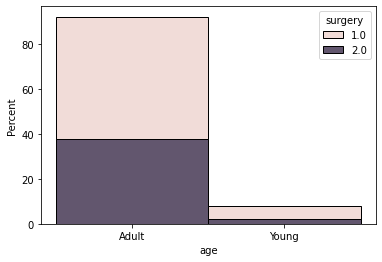

In [7]:
sns.histplot(data = df, x = 'age', stat = 'percent', hue = 'surgery', multiple = 'stack')
#element = 'poly'

In [8]:
typos_col = {
    'surgery' : 'object',
    'r_temperature': 'float64', 
     'pulse': 'float64', 
    'resp_rate': 'float64', 
    'naso_reflux_ph': 'float64', 
    'pack_cell_vol': 'float64', 
    'protein': 'float64', 
    'abd_protein': 'float64',
    'type_lesion_1': 'object', 
    'type_lesion_2': 'object', 
    'type_lesion_3': 'object', 
}

In [9]:
df = df.astype(typos_col)

<AxesSubplot:ylabel='Frequency'>

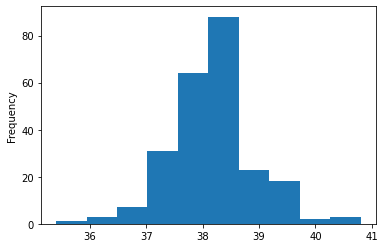

In [10]:
df['r_temperature'].plot(kind = 'hist')

<AxesSubplot:xlabel='r_temperature', ylabel='Percent'>

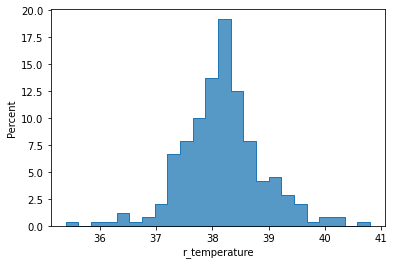

In [11]:
sns.histplot(data = df, x = 'r_temperature', stat = 'percent', element = 'step')

<AxesSubplot:>

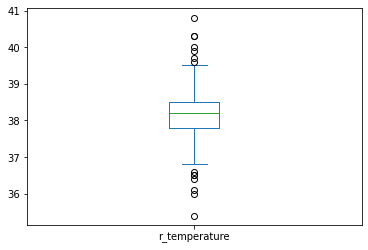

In [12]:
df['r_temperature'].plot(kind = 'box')

<AxesSubplot:xlabel='r_temperature', ylabel='age'>

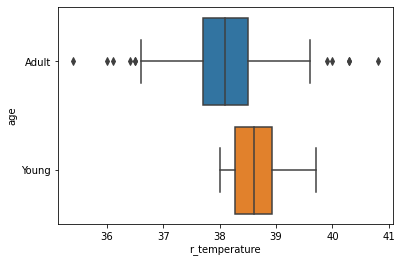

In [13]:
sns.boxplot(data = df, x = 'r_temperature', y = 'age')

<AxesSubplot:ylabel='Frequency'>

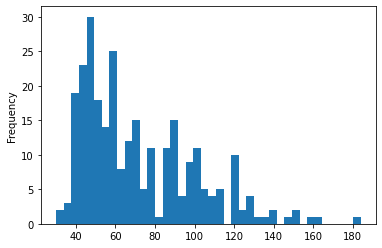

In [14]:
#yo creo que ese 180 es un dato atípico aunque dice que el caballo podría tener lesiones
df['pulse'].plot(kind = 'hist', bins = 40)

<AxesSubplot:xlabel='pulse', ylabel='Percent'>

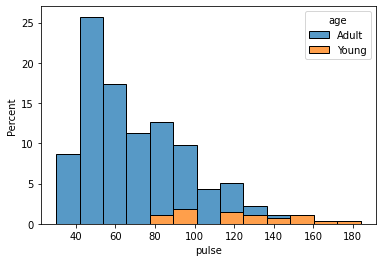

In [15]:
sns.histplot(data = df, x = 'pulse', stat = 'percent', hue = 'age', multiple = 'stack')

<AxesSubplot:>

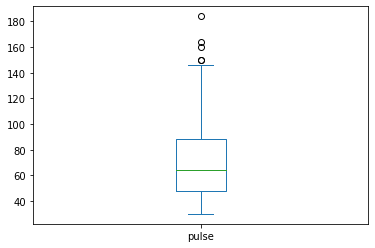

In [16]:
df['pulse'].plot(kind = 'box')

<AxesSubplot:xlabel='pulse', ylabel='age'>

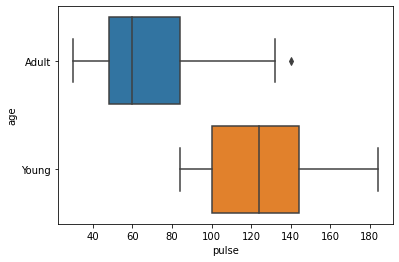

In [17]:
sns.boxplot(data = df, x = 'pulse', y = 'age')

<AxesSubplot:ylabel='Frequency'>

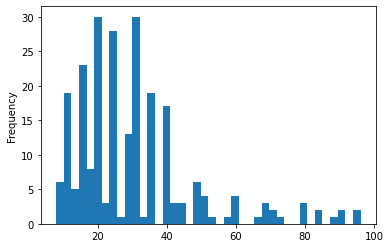

In [18]:
#y aquí que putas, si lo normal es entre 8 a 10 ????
df['resp_rate'].plot(kind = 'hist', bins = 40)

<AxesSubplot:>

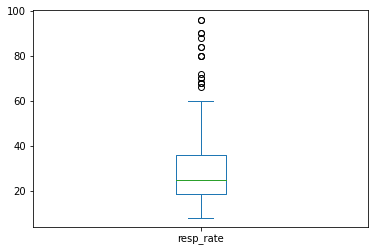

In [19]:
df['resp_rate'].plot(kind = 'box')

In [20]:
ext_temp_dict = {
    1.0: 'normal',
    2.0: 'warm',
    3.0: 'cool',
    4.0: 'cold',
}

In [21]:
df['ext_temperature'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [22]:
df['ext_temperature'] = df['ext_temperature'].map(ext_temp_dict)

In [23]:
df['ext_temperature'].unique()

array(['cool', nan, 'normal', 'cold', 'warm'], dtype=object)

In [24]:
#poner aquí la grafiquita si es que alcanzamos

In [25]:
df['per_pulse'].unique()

array([ 3., nan,  1.,  4.,  2.])

In [26]:
per_dict = {
    1.0:  'normal',
    2.0: 'increased',
    3.0: 'reduced',
    4.0: 'absent',
}

In [27]:
df['per_pulse'] = df['per_pulse'].map(per_dict)

In [28]:
df['per_pulse'].unique()

array(['reduced', nan, 'normal', 'absent', 'increased'], dtype=object)

In [29]:
df['muc_membraes'].unique()

array([nan,  4.,  3.,  6.,  1.,  5.,  2.])

In [30]:
muc_membraes_dict = {
    1.0:  'normal pink',
    2.0: 'bright pink',
    3.0: 'pale pink',
    4.0: 'pale cyanotic',
    5.0: 'bright red / injected', 
    6.0: 'dark cyanotic'
}

In [31]:
df['muc_membraes'] = df['muc_membraes'].map(muc_membraes_dict)

In [32]:
df['muc_membraes'].unique()

array([nan, 'pale cyanotic', 'pale pink', 'dark cyanotic', 'normal pink',
       'bright red / injected', 'bright pink'], dtype=object)

In [33]:
#grafiquita

In [34]:
def mucosa(value):
    if value == 'normal pink' or value == 'bright pink':
        return 'normal'
    if value == 'pale pink':
        return 'early chock'
    if value == 'pale cyanotic' or value == 'dark cyanotic':
        return 'serious circulatory compromise'
    if value == 'bright red / injected':
        return 'septicemia'

In [35]:
df['extra-muc_membraes'] = df[['muc_membraes']].applymap(mucosa)

In [36]:
df[['extra-muc_membraes']].value_counts()

extra-muc_membraes            
normal                            109
serious circulatory compromise     61
early chock                        58
septicemia                         25
dtype: int64

In [37]:
#grafiquita

In [38]:
#se supone que este valor sólo debería ser 1 y 2, y aquí qué?
df['cap_ref_time'].unique()

array([ 2.,  1., nan,  3.])

In [39]:
cap_ref_dict = {
    1.0: '< 3 seconds',
    2.0: '>= 3 seconds',
    3.0: 'desconocido',
}

In [40]:
df['cap_ref_time'] = df['cap_ref_time'].map(cap_ref_dict)

In [41]:
df['cap_ref_time'].unique()

array(['>= 3 seconds', '< 3 seconds', nan, 'desconocido'], dtype=object)

In [42]:
pain_dict = {
     1.0: 'alert, no pain',
     2.0: 'depressed',
     3.0: 'intermittent mild pain',
     4.0: 'intermittent severe pain',
     5.0: 'continuous severe pain',
}

In [43]:
df['pain'] = df['pain'].map(pain_dict)

In [44]:
df[['pain']].value_counts()

pain                    
intermittent mild pain      67
depressed                   59
continuous severe pain      42
intermittent severe pain    39
alert, no pain              38
dtype: int64

In [45]:
peris_dict = {
    1.0: 'hypermotile',
    2.0: 'normal',
    3.0: 'hypomotile',
    4.0: 'absent'
}

In [46]:
 df['peristalsis'] = df['peristalsis'].map(peris_dict)

In [47]:
df['peristalsis'].unique()

array(['absent', 'hypomotile', nan, 'hypermotile', 'normal'], dtype=object)

In [48]:
abd_dist_dict = {
    1.0: 'none',
    2.0: 'slight',
    3.0: 'moderate',
    4.0: 'severe'
}

In [49]:
df['abd_distension'] = df['abd_distension'].map(abd_dist_dict) 

In [50]:
df['abd_distension'].unique()

array(['severe', 'slight', 'none', nan, 'moderate'], dtype=object)

In [51]:
naso_tub_dict = {
    1.0: 'none',
    2.0: 'slight',
    3.0: 'significant',
}

In [52]:
df['naso_tub'] = df['naso_tub'].map(naso_tub_dict) 

In [53]:
df['naso_tub'].unique()

array([nan, 'none', 'slight', 'significant'], dtype=object)

In [54]:
naso_reflux_dict = {
    1.0: 'none',
    2.0: '> 1 liter',
    3.0: '< 1 liter',
}

In [55]:
df['naso_reflux'] = df['naso_reflux'].map(naso_reflux_dict)

In [56]:
df['naso_tub'].unique()

array([nan, 'none', 'slight', 'significant'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

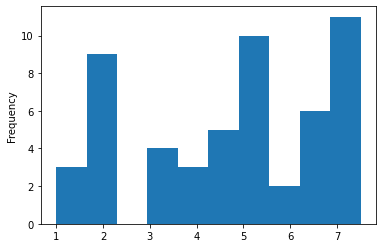

In [57]:
df['naso_reflux_ph'].plot(kind = 'hist')

<AxesSubplot:>

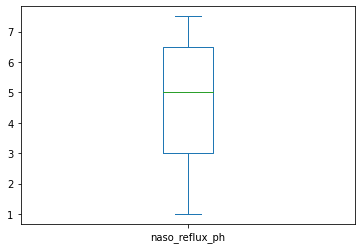

In [58]:
df['naso_reflux_ph'].plot(kind = 'box')

In [59]:
rect_exam_dict = {
    1.0: 'none',
    2.0: 'increased',
    3.0: 'decreased',
    4.0: 'absent'
}

In [60]:
df['rect_exam'] = df['rect_exam'].map(rect_exam_dict)

In [61]:
df['rect_exam'].unique()

array(['decreased', 'absent', 'none', nan, 'increased'], dtype=object)

In [62]:
abdomen_dict = {
    1.0: 'normal',
    2.0: 'other',
    3.0: 'firm feces in the large intestine',
    4.0: 'distended small intestine',
    5.0: 'distended large intestine'
}

In [63]:
df['abdomen'] = df['abdomen'].map(abdomen_dict)

In [64]:
df['abdomen'].unique()

array(['distended large intestine', 'other', 'normal', nan,
       'firm feces in the large intestine', 'distended small intestine'],
      dtype=object)

<AxesSubplot:ylabel='Frequency'>

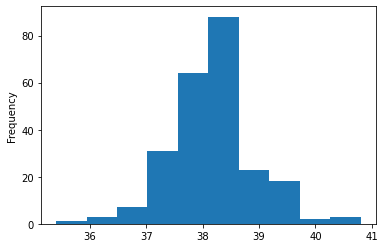

In [65]:
#normal range is 30 to 50. The level rises as the circulation becomes compromised or as the animal becomes dehydrated
df['r_temperature'].plot(kind = 'hist')

<AxesSubplot:>

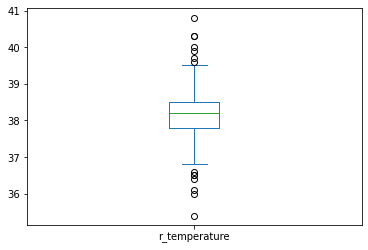

In [66]:
#aquí por ejemplo la gráfica de box no me dice mucho porque según los datos es normal un valor entre 30 y 50
df['r_temperature'].plot(kind = 'box')

<AxesSubplot:ylabel='Frequency'>

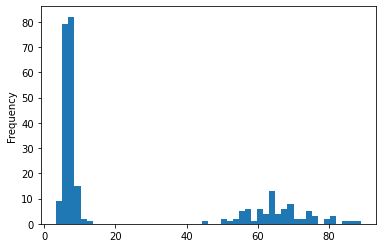

In [67]:
#se puede separar esta gráfica como por rangos? ver un pedacito y luego otro pedacito
df['protein'].plot(kind = 'hist', bins = 50)

<AxesSubplot:xlabel='protein', ylabel='Count'>

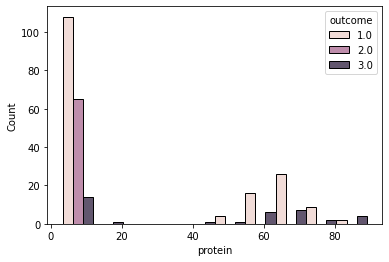

In [68]:
sns.histplot(data = df, x = 'protein', hue = 'outcome', multiple = 'dodge')

In [69]:
df[df['protein']> 40] #loc iloc

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra,extra-muc_membraes
1,1.0,Adult,534817,39.2,88.0,20.0,NaN,NaN,pale cyanotic,< 3 seconds,...,2.0,2.0,3.0,2,2208,0,0,2,NaN,serious circulatory compromise
14,1.0,Adult,534917,38.2,76.0,28.0,cool,normal,normal pink,< 3 seconds,...,1.0,2.0,1.0,1,2112,0,0,2,NaN,normal
23,1.0,Young,534998,38.3,130.0,60.0,NaN,reduced,NaN,< 3 seconds,...,NaN,NaN,1.0,1,3111,0,0,2,NaN,None
24,1.0,Adult,533692,38.1,60.0,12.0,cool,reduced,pale pink,< 3 seconds,...,NaN,NaN,1.0,1,3111,0,0,2,NaN,early chock
29,2.0,Adult,535415,37.7,48.0,NaN,warm,normal,normal pink,< 3 seconds,...,NaN,NaN,1.0,2,0,0,0,2,NaN,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
290,2.0,Adult,535054,38.6,45.0,16.0,warm,normal,bright pink,< 3 seconds,...,NaN,NaN,1.0,2,0,0,0,2,NaN,normal
293,1.0,Adult,534004,NaN,78.0,24.0,cool,reduced,pale pink,< 3 seconds,...,NaN,2.0,3.0,2,2209,0,0,2,NaN,early chock
294,2.0,Adult,533902,38.5,40.0,16.0,normal,normal,normal pink,< 3 seconds,...,NaN,NaN,1.0,2,0,0,0,2,NaN,normal
295,1.0,Adult,533886,NaN,120.0,70.0,cold,NaN,pale cyanotic,>= 3 seconds,...,NaN,NaN,3.0,2,3205,0,0,2,NaN,serious circulatory compromise


<AxesSubplot:xlabel='protein', ylabel='Count'>

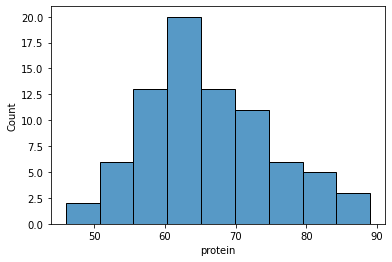

In [70]:
sns.histplot(data = df[df['protein']> 40], x = 'protein')

In [71]:
abd_appearance_dict = {
    1.0: 'clear',
    2.0: 'cloudy',
    3.0: 'serosanguinous'
}

In [72]:
df['abd_appearance'] = df['abd_appearance'].map(abd_appearance_dict)

In [73]:
df['abd_appearance'].unique()

array([nan, 'cloudy', 'serosanguinous', 'clear'], dtype=object)

<AxesSubplot:ylabel='Frequency'>

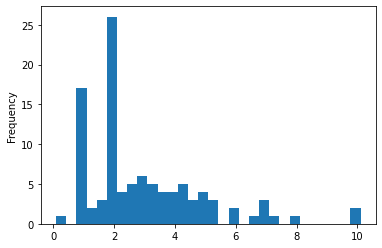

In [74]:
df['abd_protein'].plot(kind = 'hist', bins = 30)

<AxesSubplot:>

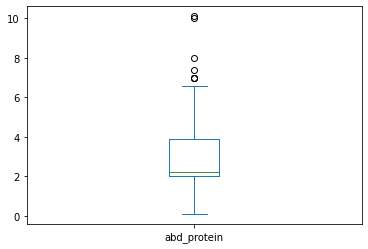

In [75]:
df['abd_protein'].plot(kind = 'box')

In [76]:
outcome_dict = {
    1.0: 'lived',
    2.0: 'died',
    3.0: 'was euthanized'
}


In [77]:
df['outcome'] = df['outcome'].map(outcome_dict)

In [78]:
df[['outcome']].value_counts()

outcome       
lived             178
died               77
was euthanized     44
dtype: int64

In [79]:
df['surgical_lesion'] = df[['surgical_lesion']].applymap(lambda x: True if x== 1 else False)

In [80]:
df = df.drop('extra', axis = 1)

In [81]:
df

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,protein,abd_appearance,abd_protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra-muc_membraes
0,2.0,Adult,530101,38.5,66.0,28.0,cool,reduced,NaN,>= 3 seconds,...,8.4,NaN,NaN,died,False,11300,0,0,2,None
1,1.0,Adult,534817,39.2,88.0,20.0,NaN,NaN,pale cyanotic,< 3 seconds,...,85.0,cloudy,2.0,was euthanized,False,2208,0,0,2,serious circulatory compromise
2,2.0,Adult,530334,38.3,40.0,24.0,normal,normal,pale pink,< 3 seconds,...,6.7,NaN,NaN,lived,False,0,0,0,1,early chock
3,1.0,Young,5290409,39.1,164.0,84.0,cold,normal,dark cyanotic,>= 3 seconds,...,7.2,serosanguinous,5.3,died,True,2208,0,0,1,serious circulatory compromise
4,2.0,Adult,530255,37.3,104.0,35.0,NaN,NaN,dark cyanotic,>= 3 seconds,...,7.4,NaN,NaN,died,False,4300,0,0,2,serious circulatory compromise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,Adult,533886,NaN,120.0,70.0,cold,NaN,pale cyanotic,>= 3 seconds,...,65.0,NaN,NaN,was euthanized,False,3205,0,0,2,serious circulatory compromise
296,2.0,Adult,527702,37.2,72.0,24.0,cool,increased,pale cyanotic,>= 3 seconds,...,NaN,serosanguinous,3.3,was euthanized,True,2208,0,0,1,serious circulatory compromise
297,1.0,Adult,529386,37.5,72.0,30.0,cold,reduced,pale cyanotic,< 3 seconds,...,6.8,NaN,NaN,died,True,3205,0,0,2,serious circulatory compromise
298,1.0,Adult,530612,36.5,100.0,24.0,cool,reduced,pale pink,< 3 seconds,...,6.0,serosanguinous,3.4,lived,True,2208,0,0,1,early chock


## Implementar el modelo

In [84]:
#veamos el nímero de nulos que tienen nuestros datos. 
df.isnull().mean()*100
#Esta forma nos permite ver el porcentaje de entradas que son nulas por cada una de las columnas=>variables

surgery                0.333333
age                    0.000000
hospital_number        0.000000
r_temperature         20.000000
pulse                  8.000000
resp_rate             19.333333
ext_temperature       18.666667
per_pulse             23.000000
muc_membraes          15.666667
cap_ref_time          10.666667
pain                  18.333333
peristalsis           14.666667
abd_distension        18.666667
naso_tub              34.666667
naso_reflux           35.333333
naso_reflux_ph        82.333333
rect_exam             34.000000
abdomen               39.333333
pack_cell_vol          9.666667
protein               11.000000
abd_appearance        55.000000
abd_protein           66.000000
outcome                0.333333
surgical_lesion        0.000000
type_lesion_1          0.000000
type_lesion_2          0.000000
type_lesion_3          0.000000
cp_data                0.000000
extra-muc_membraes    15.666667
dtype: float64

In [85]:
#el objetivo es revisar cuantos datos nulos hay y seleccionar las columnas que son relevantes para el modelo
#En este caso vamos a seleccionar como variables relevantes, aquellas que no tengan más del 50% de datos nulos
#entonces vamos ordenar las columnas según su valor de datos nulos

In [87]:
#Para eso vamos a crear un dataframe con los valores de datos nulos, que encontramos antes
pd.DataFrame(df.isnull().mean(), columns = ['% Nulos'])
#el nombre %Nulos es un muy buen nombre si quiero mostrar los datos, pero si quiero exportarlos
#como a un CSV o algo similar, lo mejor es no usar nombres raros. Ej: porc_nulos

,% Nulos
surgery,0.003333
age,0.000000
hospital_number,0.000000
r_temperature,0.200000
pulse,0.080000
resp_rate,0.193333
ext_temperature,0.186667
per_pulse,0.230000
muc_membraes,0.156667
cap_ref_time,0.106667


In [91]:
#guardemos el dataframe que acabamos de crear
nulos = pd.DataFrame(df.isnull().mean()*100, columns = ['% Nulos'])

In [92]:
#ordenamos nuestro nuevo dataframe
nulos.sort_values(['% Nulos'])
#este método ordena de forma ascendente los valores. 
#no es necesario poner los paréntesis cuadrados: nulos.sort_values('% Nulos')
#sin embargo poner los paréntesis cuadrados nos sirve si queremos ordenar por medio de varias columnas

,% Nulos
age,0.000000
hospital_number,0.000000
type_lesion_3,0.000000
type_lesion_2,0.000000
type_lesion_1,0.000000
surgical_lesion,0.000000
cp_data,0.000000
surgery,0.333333
outcome,0.333333
pulse,8.000000


In [93]:
#guardamos el orden y lo ponemos de forma descendente
nulos = nulos.sort_values(['% Nulos'], ascending = False)

In [95]:
#aquí ya tenemos una idea de las columnas que podemos eliminar
nulos

,% Nulos
naso_reflux_ph,82.333333
abd_protein,66.000000
abd_appearance,55.000000
abdomen,39.333333
naso_reflux,35.333333
naso_tub,34.666667
rect_exam,34.000000
per_pulse,23.000000
r_temperature,20.000000
resp_rate,19.333333


In [113]:
#si me equivoco puedo copiar el dataframe, aunque esto no es lo adecuado si tengo muchos datos
horses_data = df.copy()

In [114]:
#eliminamos las columnas. Drop primero verifica los valores en los índices, es decir fila por fila. 
#pero yo no quiero que elimine por las filas, sino por las columnas, y para tenemos dos opciones: 
#añadir axis = 'columns' OR axis = 1
horses_data = horses_data.drop(['naso_reflux_ph',
                                'abd_protein',
                                'abd_appearance'                   
                               ], axis = 'columns')

In [115]:
horses_data.shape

(300, 26)

Segunda forma para eliminar las columnas por número de nulos

In [139]:
horses_data = df.copy()

In [140]:
#esta función me saca un index que no es un objeto iterable
horses_data.columns

Index(['surgery', 'age', 'hospital_number', 'r_temperature', 'pulse',
       'resp_rate', 'ext_temperature', 'per_pulse', 'muc_membraes',
       'cap_ref_time', 'pain', 'peristalsis', 'abd_distension', 'naso_tub',
       'naso_reflux', 'naso_reflux_ph', 'rect_exam', 'abdomen',
       'pack_cell_vol', 'protein', 'abd_appearance', 'abd_protein', 'outcome',
       'surgical_lesion', 'type_lesion_1', 'type_lesion_2', 'type_lesion_3',
       'cp_data', 'extra-muc_membraes'],
      dtype='object')

In [107]:
#para tener un objeto iterable, una lista, tenemos tres opciones: 

#horses_data.columns.to_list()
#list(horses_data.columns)
horses_data.columns.tolist()

['surgery',
 'age',
 'hospital_number',
 'r_temperature',
 'pulse',
 'resp_rate',
 'ext_temperature',
 'per_pulse',
 'muc_membraes',
 'cap_ref_time',
 'pain',
 'peristalsis',
 'abd_distension',
 'naso_tub',
 'naso_reflux',
 'naso_reflux_ph',
 'rect_exam',
 'abdomen',
 'pack_cell_vol',
 'protein',
 'abd_appearance',
 'abd_protein',
 'outcome',
 'surgical_lesion',
 'type_lesion_1',
 'type_lesion_2',
 'type_lesion_3',
 'cp_data',
 'extra-muc_membraes']

In [141]:
for col in horses_data.columns.tolist():
    if horses_data[col].isnull().mean() > 0.5:
        horses_data = horses_data.drop(col, axis = 1)

In [142]:
horses_data.shape

(300, 26)

Posible tercera forma para eliminar datos nulos (No funcionó, porque elimina las columnas si todos los valores son nulos)

In [111]:
horses_data = df.copy()

In [112]:

horses_data. dropna(axis = 1, inplace = True)

## Imputación de datos

Estrategia para reemplazar o eliminar los datos que son nulos en un registro. Dependiendo del número de nulos, el modelo ignora estos valores, entonces podemos darle un valor cualquiera que no afecte el modelo, dado que él se ocupa del comportamiento global y no individual de los datos. 

Existen formas de imputar datos, haciendo uso de la moda, la mediana o la media según los datos. También podemos usar el k-vecino más cercano. Este último funciona registrando los datos en un plano ( hiperplano si tiene muchas variables) y asigna al valor nulo, el valor de un dato conocido (de una variable) que esté muy cerca a la variable desconocida. Se llama k-vecinos, porque se puede aproximar al primer vecino más cercano, o al segundo o al tercero... k más cercano

In [116]:
horses_data['ext_temperature'].isnull().mean()

0.18666666666666668

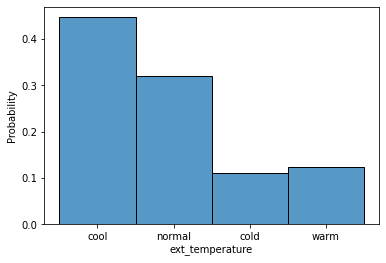

In [119]:
sns.histplot(horses_data, x = 'ext_temperature', stat = 'probability');

In [143]:
from sklearn.preprocessing import OneHotEncoder

In [145]:
horses_data_tr = pd.get_dummies(horses_data, columns =horses_data.select_dtypes(include = 'object').columns.tolist() )

/home/katherine/anaconda3/envs/prediction-horses/lib/python3.9/site-packages/pandas/core/algorithms.py:798: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  uniques = Index(uniques)


In [146]:
from sklearn.impute import SimpleImputer

In [147]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')

In [148]:
imp_mean.fit(horses_data_tr)

SimpleImputer(strategy='most_frequent')

In [149]:
horses_data_imp = imp_mean.transform(horses_data_tr)

In [150]:
horses_data_imp = pd.DataFrame(horses_data_imp, columns=horses_data_tr.columns.tolist(), dtype = 'float64')

In [152]:
horses_data_imp.head()

,hospital_number,r_temperature,pulse,resp_rate,pack_cell_vol,protein,surgical_lesion,cp_data,surgery_1.0,surgery_2.0,...,type_lesion_2_3111,type_lesion_2_3112,type_lesion_2_6112,type_lesion_2_7111,type_lesion_3_0,type_lesion_3_2209,extra-muc_membraes_early chock,extra-muc_membraes_normal,extra-muc_membraes_septicemia,extra-muc_membraes_serious circulatory compromise
0,530101.0,38.5,66.0,28.0,45.0,8.4,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,534817.0,39.2,88.0,20.0,50.0,85.0,0.0,2.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,530334.0,38.3,40.0,24.0,33.0,6.7,0.0,1.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,5290409.0,39.1,164.0,84.0,48.0,7.2,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4,530255.0,37.3,104.0,35.0,74.0,7.4,0.0,2.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [154]:
horses_data_imp.columns.tolist()

['hospital_number',
 'r_temperature',
 'pulse',
 'resp_rate',
 'pack_cell_vol',
 'protein',
 'surgical_lesion',
 'cp_data',
 'surgery_1.0',
 'surgery_2.0',
 'age_Adult',
 'age_Young',
 'ext_temperature_cold',
 'ext_temperature_cool',
 'ext_temperature_normal',
 'ext_temperature_warm',
 'per_pulse_absent',
 'per_pulse_increased',
 'per_pulse_normal',
 'per_pulse_reduced',
 'muc_membraes_bright pink',
 'muc_membraes_bright red / injected',
 'muc_membraes_dark cyanotic',
 'muc_membraes_normal pink',
 'muc_membraes_pale cyanotic',
 'muc_membraes_pale pink',
 'cap_ref_time_< 3 seconds',
 'cap_ref_time_>= 3 seconds',
 'cap_ref_time_desconocido',
 'pain_alert, no pain',
 'pain_continuous severe pain',
 'pain_depressed',
 'pain_intermittent mild pain',
 'pain_intermittent severe pain',
 'peristalsis_absent',
 'peristalsis_hypermotile',
 'peristalsis_hypomotile',
 'peristalsis_normal',
 'abd_distension_moderate',
 'abd_distension_none',
 'abd_distension_severe',
 'abd_distension_slight',
 'naso

In [155]:
horses_data_imp = horses_data_imp.drop(['outcome_died', 'outcome_was euthanized'], axis = 1)

In [156]:
horses_data_imp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Columns: 131 entries, hospital_number to extra-muc_membraes_serious circulatory compromise
dtypes: float64(131)
memory usage: 307.2 KB


In [157]:
horses_data_imp.columns.tolist()

['hospital_number',
 'r_temperature',
 'pulse',
 'resp_rate',
 'pack_cell_vol',
 'protein',
 'surgical_lesion',
 'cp_data',
 'surgery_1.0',
 'surgery_2.0',
 'age_Adult',
 'age_Young',
 'ext_temperature_cold',
 'ext_temperature_cool',
 'ext_temperature_normal',
 'ext_temperature_warm',
 'per_pulse_absent',
 'per_pulse_increased',
 'per_pulse_normal',
 'per_pulse_reduced',
 'muc_membraes_bright pink',
 'muc_membraes_bright red / injected',
 'muc_membraes_dark cyanotic',
 'muc_membraes_normal pink',
 'muc_membraes_pale cyanotic',
 'muc_membraes_pale pink',
 'cap_ref_time_< 3 seconds',
 'cap_ref_time_>= 3 seconds',
 'cap_ref_time_desconocido',
 'pain_alert, no pain',
 'pain_continuous severe pain',
 'pain_depressed',
 'pain_intermittent mild pain',
 'pain_intermittent severe pain',
 'peristalsis_absent',
 'peristalsis_hypermotile',
 'peristalsis_hypomotile',
 'peristalsis_normal',
 'abd_distension_moderate',
 'abd_distension_none',
 'abd_distension_severe',
 'abd_distension_slight',
 'naso

In [158]:
horses_data_imp.isnull().sum()

hospital_number                                      0
r_temperature                                        0
pulse                                                0
resp_rate                                            0
pack_cell_vol                                        0
                                                    ..
type_lesion_3_2209                                   0
extra-muc_membraes_early chock                       0
extra-muc_membraes_normal                            0
extra-muc_membraes_septicemia                        0
extra-muc_membraes_serious circulatory compromise    0
Length: 131, dtype: int64

In [159]:
from sklearn.naive_bayes import BernoulliNB

In [160]:
y = horses_data_imp['outcome_lived']
x = horses_data_imp.drop('outcome_lived', axis = 1)

In [161]:
##Estimadores
##Tienen fit y Predict (algunos tienen predict_proba)
clf = BernoulliNB()

In [162]:
clf.fit(x, y)

BernoulliNB()

In [163]:
y_pred = clf.predict(x)

In [164]:
y_pred

array([0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 0.,
       1., 1., 1., 0., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 0., 1., 1.,
       0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 0., 0., 0., 1., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0.,
       1., 0., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 0.,
       1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 1., 1., 1., 0., 0.,
       0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0.,
       1., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0.,
       1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 0., 0.,
       0., 0., 1., 1., 1.

In [167]:
from sklearn.metrics import accuracy_score, classification_report

In [166]:
accuracy_score(y, y_pred)

0.7666666666666667

In [168]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

         0.0       0.68      0.80      0.73       122
         1.0       0.84      0.75      0.79       178

    accuracy                           0.77       300
   macro avg       0.76      0.77      0.76       300
weighted avg       0.78      0.77      0.77       300



In [127]:
from sklearn.impute import SimpleImputer

In [131]:
imp_mean = SimpleImputer(missing_values = np.nan, strategy= 'most_frequent')

In [132]:
imp_mean.fit(horses_data)

SimpleImputer(strategy='most_frequent')

In [133]:
imp_mean.statistics_

array([1.0, 'Adult', 527544, 38.0, 48.0, 20.0, 'cool', 'normal',
       'normal pink', '< 3 seconds', 'intermittent mild pain',
       'hypomotile', 'none', 'slight', 'none', 'absent',
       'distended large intestine', 37.0, 6.5, 'lived', True, 0, 0, 0, 2,
       'normal'], dtype=object)

In [134]:
horses_data_tr = imp_mean.transform(horses_data)

In [135]:
horses_data_tr = pd.DataFrame(horses_data_tr, columns=horses_data.columns.tolist())

In [136]:
horses_data_tr

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,abdomen,pack_cell_vol,protein,outcome,surgical_lesion,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra-muc_membraes
0,2.0,Adult,530101,38.5,66.0,28.0,cool,reduced,normal pink,>= 3 seconds,...,distended large intestine,45.0,8.4,died,False,11300,0,0,2,None
1,1.0,Adult,534817,39.2,88.0,20.0,cool,normal,pale cyanotic,< 3 seconds,...,other,50.0,85.0,was euthanized,False,2208,0,0,2,serious circulatory compromise
2,2.0,Adult,530334,38.3,40.0,24.0,normal,normal,pale pink,< 3 seconds,...,normal,33.0,6.7,lived,False,0,0,0,1,early chock
3,1.0,Young,5290409,39.1,164.0,84.0,cold,normal,dark cyanotic,>= 3 seconds,...,distended large intestine,48.0,7.2,died,True,2208,0,0,1,serious circulatory compromise
4,2.0,Adult,530255,37.3,104.0,35.0,cool,normal,dark cyanotic,>= 3 seconds,...,distended large intestine,74.0,7.4,died,False,4300,0,0,2,serious circulatory compromise
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,Adult,533886,38.0,120.0,70.0,cold,normal,pale cyanotic,>= 3 seconds,...,distended large intestine,55.0,65.0,was euthanized,False,3205,0,0,2,serious circulatory compromise
296,2.0,Adult,527702,37.2,72.0,24.0,cool,increased,pale cyanotic,>= 3 seconds,...,distended small intestine,44.0,6.5,was euthanized,True,2208,0,0,1,serious circulatory compromise
297,1.0,Adult,529386,37.5,72.0,30.0,cold,reduced,pale cyanotic,< 3 seconds,...,distended large intestine,60.0,6.8,died,True,3205,0,0,2,serious circulatory compromise
298,1.0,Adult,530612,36.5,100.0,24.0,cool,reduced,pale pink,< 3 seconds,...,distended small intestine,50.0,6.0,lived,True,2208,0,0,1,early chock


In [128]:
from sklearn.preprocessing import OneHotEncoder

Creamos el objeto para el tratamiento con OneHotEncoder

In [129]:
ohe = OneHotEncoder()

In [ ]:
#primera forma de hacerlo
#pd.get_dummies(horses_data, columns =horses_data.select_dtypes(include = 'object').columns.tolist() )

In [130]:
#segunda forma de hacerlo drop_first evalúa cuales son las categorías y a la última ya le pone true or false
pd.get_dummies(horses_data, columns = ['surgical_lesion'], drop_first = True)

,surgery,age,hospital_number,r_temperature,pulse,resp_rate,ext_temperature,per_pulse,muc_membraes,cap_ref_time,...,abdomen,pack_cell_vol,protein,outcome,type_lesion_1,type_lesion_2,type_lesion_3,cp_data,extra-muc_membraes,surgical_lesion_True
0,2.0,Adult,530101,38.5,66.0,28.0,cool,reduced,NaN,>= 3 seconds,...,distended large intestine,45.0,8.4,died,11300,0,0,2,None,0
1,1.0,Adult,534817,39.2,88.0,20.0,NaN,NaN,pale cyanotic,< 3 seconds,...,other,50.0,85.0,was euthanized,2208,0,0,2,serious circulatory compromise,0
2,2.0,Adult,530334,38.3,40.0,24.0,normal,normal,pale pink,< 3 seconds,...,normal,33.0,6.7,lived,0,0,0,1,early chock,0
3,1.0,Young,5290409,39.1,164.0,84.0,cold,normal,dark cyanotic,>= 3 seconds,...,NaN,48.0,7.2,died,2208,0,0,1,serious circulatory compromise,1
4,2.0,Adult,530255,37.3,104.0,35.0,NaN,NaN,dark cyanotic,>= 3 seconds,...,NaN,74.0,7.4,died,4300,0,0,2,serious circulatory compromise,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1.0,Adult,533886,NaN,120.0,70.0,cold,NaN,pale cyanotic,>= 3 seconds,...,distended large intestine,55.0,65.0,was euthanized,3205,0,0,2,serious circulatory compromise,0
296,2.0,Adult,527702,37.2,72.0,24.0,cool,increased,pale cyanotic,>= 3 seconds,...,distended small intestine,44.0,NaN,was euthanized,2208,0,0,1,serious circulatory compromise,1
297,1.0,Adult,529386,37.5,72.0,30.0,cold,reduced,pale cyanotic,< 3 seconds,...,distended large intestine,60.0,6.8,died,3205,0,0,2,serious circulatory compromise,1
298,1.0,Adult,530612,36.5,100.0,24.0,cool,reduced,pale pink,< 3 seconds,...,distended small intestine,50.0,6.0,lived,2208,0,0,1,early chock,1
